<a href="https://colab.research.google.com/github/Sleepyawk/CS-4650/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy

In [2]:
!pip install newsapi-python

In [3]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0        [#Mr, #Bidens, #new, #coronavirus, #response]
1             [#After, #week, #offline, #Photo, #Nora]
2               [#Italy, #MILAN, #March, #8, #Reuters]
3              [#Italy, #MILAN, #March, #21, #Reuters]
4                [#HONG, #KONG, #March, #26, #Reuters]
5           [#Stopping, #spread, #Covid, #19, #public]
6     [#Italys, #former, #prime, #minister, #Giuseppe]
7     [#Britains, #economy, #bounced, #back, #Omicron]
8       [#The, #NHS, #coming, #significant, #pressure]
9            [#1, #BERLIN, #March, #Reuters, #Germany]
10          [#VIENNA, #March, #3, #Reuters, #Austrian]
11              [#TOKYO, #March, #3, #Reuters, #Japan]
12                [#HONG, #KONG, #March, #7, #Reuters]
13                        [#N, #F, #L, #The, #Players]
14               [#new, #variants, #Mr, #Biden, #also]
15               [#HONG, #KONG, #March, #10, #Reuters]
1

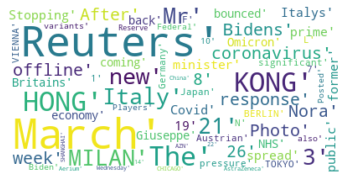

In [5]:
#This program extracts keywords from news articles using the newsapi library.
#This was coded in Google Collab following the tutorial: https://medium.com/analytics-vidhya/extracting-keywords-from-covid-19-news-with-python-13249571d37b

#Requires installation of these packages
#!pip install spacy
#!pip install newsapi-python
#!python -m spacy download en_core_web_lg
import spacy
import en_core_web_lg
import newsapi
from newsapi import NewsApiClient
import pickle
import pandas as pd
from collections import Counter 

#NLTK to help tokenize and parse text
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

#Matplot and WordCloud image
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

#Loads the news articles from using an API key: https://newsapi.org/docs
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='Your API Key')
#Can only obtain news within the last month without subscribing to the service
articles = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-27', to='2022-03-27', sort_by='relevancy', page=5)

#Saved news locally to Google Collab using Pickle library
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

df = pd.DataFrame(articles['articles'])

#Function to identify keywords
def get_keywords_eng(text):
  result = []
  stop_words = stopwords.words('english')
  
  #Extracts verbs, nouns, and proper nouns
  for i in text:
    if (i in stop_words):
      continue
    else:
      result.append(i)
  return result

#Adds the most common keywords into the dataframe and prints out the result
results = []
tokenizer = RegexpTokenizer(r'\w+') #Identifies english punctuations: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
for content in df.content.values:
    content = tokenizer.tokenize(content)
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results
print(df['keywords'])

#Plots the dataframe keywords into WordCloud
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()